In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/pre_processed_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736947 entries, 0 to 736946
Columns: 199 entries, Quantity Sold (kilo) to Category Name_Solanum
dtypes: bool(197), float64(2)
memory usage: 149.7 MB


In [3]:
df.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper,Item Name_Agaricus Bisporus,Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth,Item Name_Apricot Bao Mushroom,Item Name_Artemisia Stelleriana,Item Name_Basil,...,Item Name_Zhijiang Red Bolt,Item Name_Zhimaxiancai,Item Name_Zhuyecai,Item Name_Zhuyecai,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower/Leaf Vegetables,Category Name_Solanum
215066,0.5,8.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
285338,0.3,12.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
692378,0.7,6.6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [4]:
y = df['Quantity Sold (kilo)']
x = df.drop(columns=['Quantity Sold (kilo)'], axis=1)

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2023-12-06 18:57:43.484427: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-06 18:57:43.484509: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-06 18:57:43.484530: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-06 18:57:43.484625: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-06 18:57:43.484717: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([589557, 198]), TensorShape([73695, 198]), (73695, 198))

In [5]:
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/testing_dataset.csv')
df_test.sample(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper,Item Name_Agaricus Bisporus,Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth,Item Name_Apricot Bao Mushroom,Item Name_Artemisia Stelleriana,Item Name_Basil,...,Item Name_Zhijiang Red Bolt,Item Name_Zhimaxiancai,Item Name_Zhuyecai,Item Name_Zhuyecai,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower/Leaf Vegetables,Category Name_Solanum
65160,1.0,4.9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
69654,0.6,8.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
54703,1.0,5.9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9008,0.9,6.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
57951,0.4,18.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(198, activation='relu', input_shape=(x_train_tensor.shape[1],)))

model.add(tf.keras.layers.Reshape((1, 198))) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.LSTM(32))

model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 20

history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/20


2023-12-06 18:57:52.136368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-12-06 18:57:52.206653: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


18424/18424 [==============================] - 267s 14ms/step - loss: 0.1305 - mae: 0.1305 - val_loss: 0.1243 - val_mae: 0.1243
Epoch 2/20
18424/18424 [==============================] - 266s 14ms/step - loss: 0.1234 - mae: 0.1234 - val_loss: 0.1219 - val_mae: 0.1219
Epoch 3/20
18424/18424 [==============================] - 265s 14ms/step - loss: 0.1222 - mae: 0.1222 - val_loss: 0.1216 - val_mae: 0.1216
Epoch 4/20
18424/18424 [==============================] - 266s 14ms/step - loss: 0.1217 - mae: 0.1217 - val_loss: 0.1226 - val_mae: 0.1226
Epoch 5/20
18424/18424 [==============================] - 268s 15ms/step - loss: 0.1214 - mae: 0.1214 - val_loss: 0.1213 - val_mae: 0.1213
Epoch 6/20
18424/18424 [==============================] - 267s 14ms/step - loss: 0.1212 - mae: 0.1212 - val_loss: 0.1211 - val_mae: 0.1211
Epoch 7/20
18424/18424 [==============================] - 268s 15ms/step - loss: 0.1211 - mae: 0.1211 - val_loss: 0.1215 - val_mae: 0.1215
Epoch 8/20
18424/18424 [==============

In [13]:
y_predictions = model.predict(x_test_tensor)
y_predictions[:5]

2303/2303 [==============================] - 13s 6ms/step


array([[0.3989164 ],
       [0.49904183],
       [0.3986001 ],
       [0.4959774 ],
       [0.9992976 ]], dtype=float32)

In [14]:
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0.6, 0.4, 0.7, 0.9, 1. ], dtype=float32)>

Text(0, 0.5, 'loss')

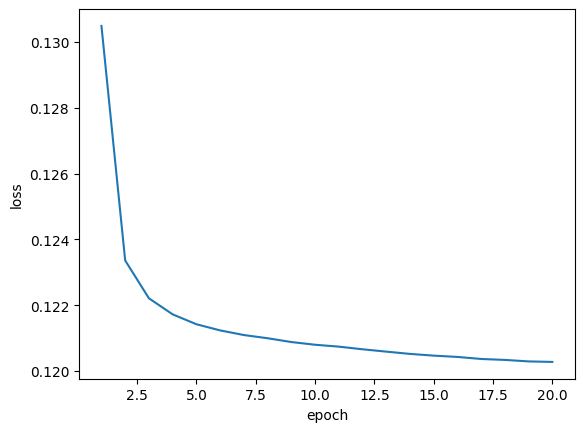

In [10]:
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
final_model = tf.keras.Sequential()

final_model.add(tf.keras.layers.Dense(198, activation='relu', input_shape=(x_train_tensor.shape[1],)))

final_model.add(tf.keras.layers.Reshape((1, 198))) 
final_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
final_model.add(tf.keras.layers.Dense(128, activation='relu'))
final_model.add(tf.keras.layers.Dense(64, activation='relu'))
final_model.add(tf.keras.layers.LSTM(32))

final_model.add(tf.keras.layers.Dense(1, activation='linear'))

final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 15

history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

In [ ]:
final_model.evaluate(x_test_tensor, y_test_tensor)

In [ ]:
final_model.save('final_sold_amount_model')